In [1]:
# Let's see what the count maps look like for a single night. 
# There is a call for getting repeat visits at ~1.5 hours after initial pair. That gets expensive for 
# doing on all blobs, but we could target overlap regions that have especially good light curve
# spacing already.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [3]:
dbFile = 'rolling_mix_10yrs_opsim.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [39]:
bundleList = []

metric = metrics.CountMetric(col='observationStartMJD')
slicer = slicers.HealpixSlicer()
sql = 'night=800'

bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))
# Let's find the min time between visits
metric = metrics.IntraNightGapsMetric(reduceFunc=np.min)
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint night=800 for columns ['fieldRA', 'night', 'observationStartMJD', 'fieldDec']
Found 772 visits
Running:  ['opsim_Count_observationStartMJD_night800_HEAL', 'opsim_Median_Intra-Night_Gap_night800_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night=800" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 1.90355  dipole: lon: 170.52, lat: -8.7889, amp: 1.02147
monopole: 0.292865  dipole: lon: 151.388, lat: -3.45239, amp: 0.0934995
Plotting complete.


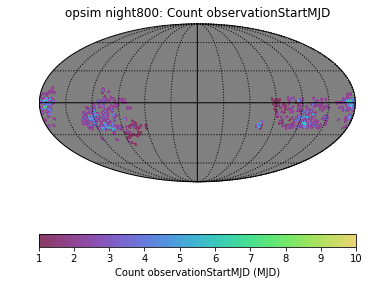

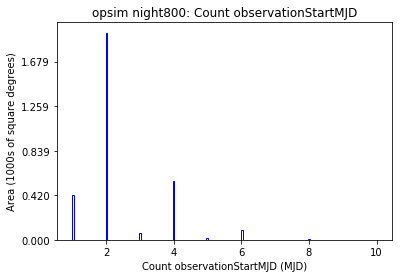

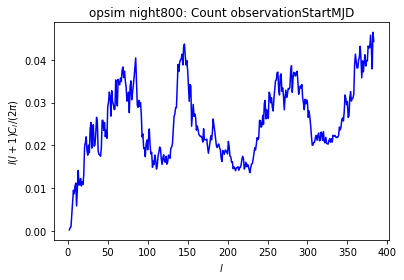

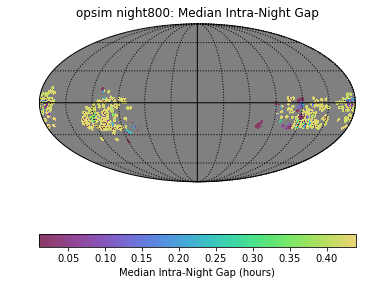

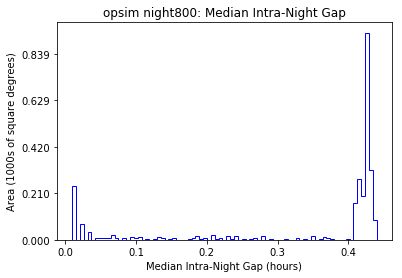

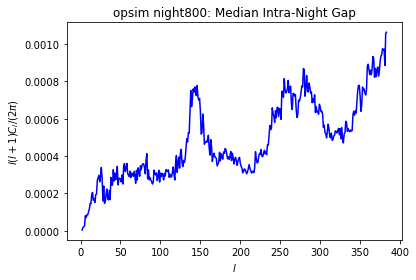

In [40]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()


bg.plotAll(closefigs=False)



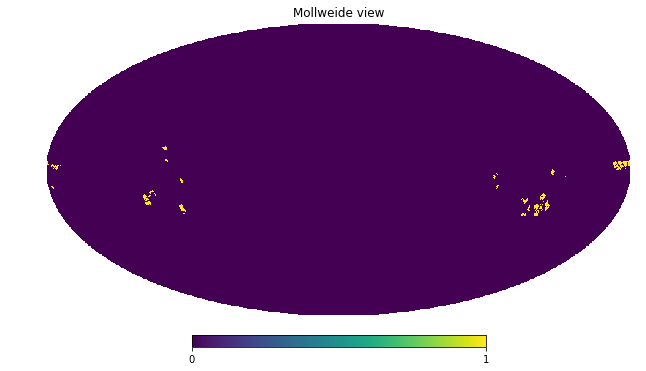

In [42]:
potential = np.zeros(bundleList[0].metricValues.size)
ack = np.where((bundleList[0].metricValues >= 3) & (bundleList[1].metricValues > 0.15) & (bundleList[1].metricValues < 0.35))
potential[ack] += 1
hp.mollview(potential)

In [43]:
hp.nside2pixarea(128, degrees=True)*ack[0].size

126.10387019297781